In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from keras import models, layers
from keraspp import skeras

In [8]:
class Machine():
    def __init__(self):
        self.data = Dataset()
        shape = self.data.X.shape[1:]
        self.model = rnn_model(shape)
    
    def run(self, epochs=400):
        d = self.data
        X_train, X_test = d.X_train, d.X_test
        y_train, y_test = d.y_train, d.y_test
        X, y = d.X, d.y
        m = self.model
        h = m.fit(X_train, y_train, epochs=epochs, validation_data=[X_test, y_test], verbose=0)
        
        skeras.plot_loss(h)
        plt.title('History of training')
        plt.show()
        
        yp = m.predict(X_test).reshape(-1)
        print('Loss:', m.evaluate(X_test, y_test))
        plt.plot(y_test, label='Original')
        plt.plot(yp, label='Prediction')
        plt.legend(loc=0)
        plt.title('Validation Results')
        plt.show()
        
        yp = m.predict(X_test).reshape(-1)
        print('Loss:', m.evaluate(X_test, y_test))
        print(yp.shape, y_test.shape)
        
        df = pd.DataFrame()
        df['Sample'] = list(range(len(y_test)))*2
        df['Normalized #Passengers'] = np.concatenate([y_test, yp], axis=0)
        df['Type'] = ['Original'] * len(y_test) + ['Prediction'] * len(yp)
        
        display(df)
        #print(df)
        #df.head()
        #df.tail()
        
        plt.figure(figsize=(7, 5))
        sns.barplot(x='Sample', y='Normalized #Passengers', hue='Type', data=df)
        plt.ylabel('Normalized #Passengers')
        plt.show()
        
        yp = m.predict(X)
        plt.plot(y, label='Original')
        plt.plot(yp, label='Prediction')
        plt.legend(loc=0)
        plt.title('All Results')
        plt.show()
    
def rnn_model(shape):
    m_x = layers.Input(shape=shape)
    m_h = layers.LSTM(10)(m_x)
    m_y = layers.Dense(1)(m_h)

    m = models.Model(m_x, m_y)
    m.compile('adam', 'mean_squared_error')
    m.summary()
    
    return m

In [9]:
class Dataset:
    def __init__(self, fname='international-airline-passengers.csv', D=12):
        data_dn = load_data(fname=fname)
        X, y = get_Xy(data_dn, D=D)
        X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
        self.X, self.y = X, y
        self.X_train, self.X_test = X_train, X_test
        self.y_train, self.y_test = y_train, y_test
        
def load_data(fname='international-airline-passengers.csv'):
    dataset = pd.read_csv(fname, usecols=[1], engine='python', skipfooter=3)
    data = dataset.values.reshape(-1)
    plt.plot(data)
    plt.xlabel('Time')
    plt.ylabel('#Passengers')
    plt.title('Original Data')
    plt.show()

    data_dn = (data - np.mean(data)) / np.std(data) / 5
    plt.plot(data_dn)
    plt.xlabel('Time')
    plt.ylabel('Normalized #Passengers')
    plt.title('Normalized data by $E[]$ and $5\sigma$')
    plt.show()
    
    return data_dn

def get_Xy(data, D=12):
    X_l = []
    y_l = []
    N = len(data)
    assert N > D, 'N should be larger than D, where N is len(data)'
    for ii in range(N-D-1):
        X_l.append(data[ii:ii+D])
        y_l.append(data[ii+D])

    X = np.array(X_l)
    X = X.reshape(X.shape[0], X.shape[1], 1)
    y = np.array(y_l)
    print(X.shape, y.shape)
    return X, y


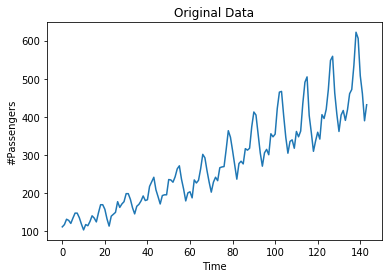

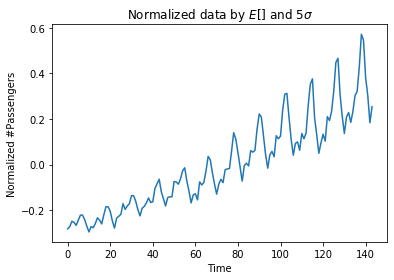

(119, 24, 1) (119,)
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 24, 1)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


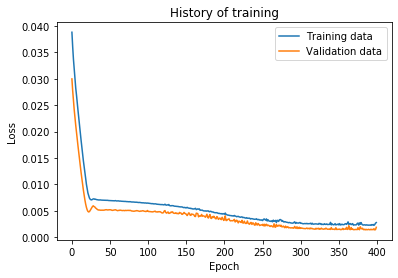

24/24 [==============================] - 0s 163us/step
Loss: 0.001900572911836207


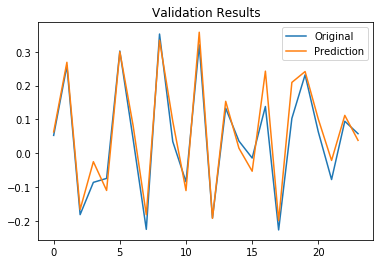

24/24 [==============================] - 0s 160us/step
Loss: 0.001900572911836207
(24,) (24,)


,Sample,Normalized #Passengers,Type
0,0,0.053035,Original
1,1,0.258808,Original
2,2,-0.181179,Original
3,3,-0.085820,Original
4,4,-0.074110,Original
5,5,0.302305,Original
6,6,0.042997,Original
7,7,-0.224675,Original
8,8,0.352494,Original
9,9,0.034632,Original


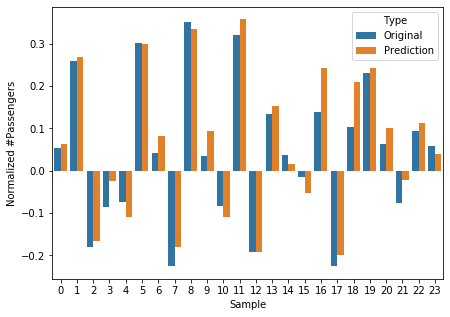

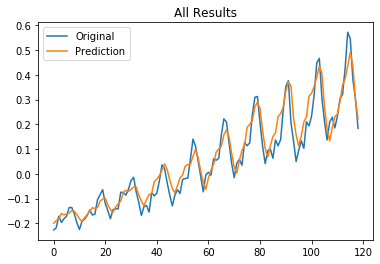

In [6]:
machine = Machine()
machine.run(epochs=400)

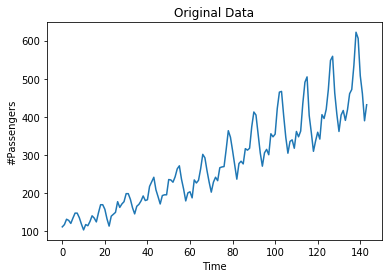

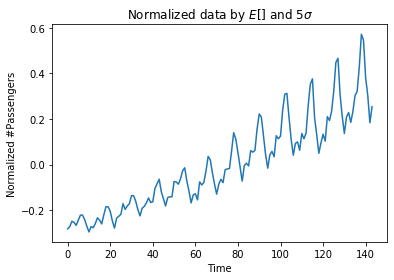

(131, 12, 1) (131,)
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 12, 1)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


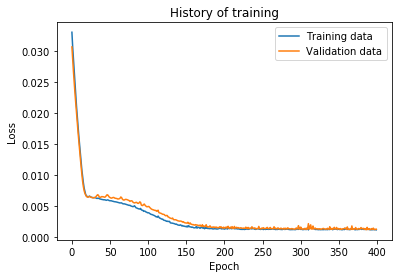

27/27 [==============================] - 0s 96us/step
Loss: 0.0012797453673556447


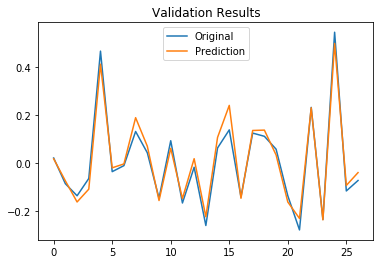

27/27 [==============================] - 0s 90us/step
Loss: 0.0012797453673556447
(27,) (27,)


,Sample,Normalized #Passengers,Type
0,0,0.021249,Original
1,1,-0.085820,Original
2,2,-0.136009,Original
3,3,-0.064072,Original
4,4,0.466254,Original
5,5,-0.035632,Original
6,6,-0.010537,Original
7,7,0.131664,Original
8,8,0.042997,Original
9,9,-0.146047,Original


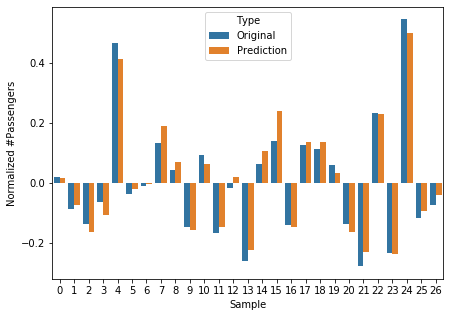

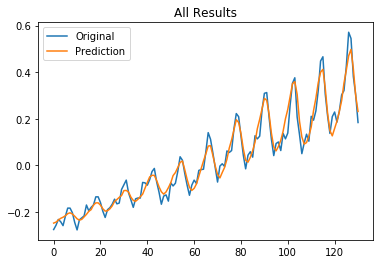

In [10]:
machine = Machine()
machine.run(epochs=400)

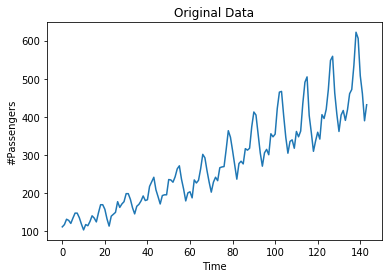

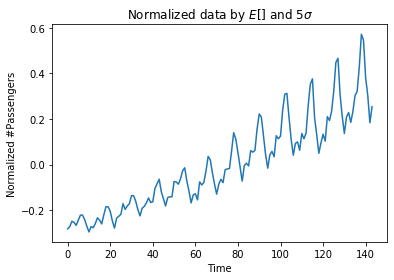

(119, 24, 1) (119,)
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 24, 1)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


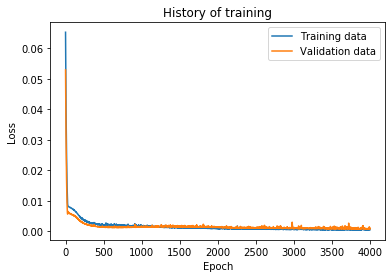

24/24 [==============================] - 0s 165us/step
Loss: 0.0008749910048209131


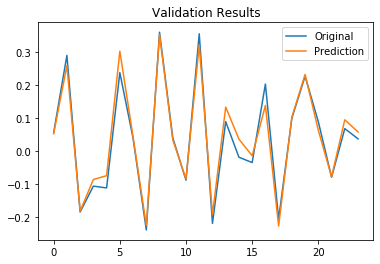

24/24 [==============================] - 0s 159us/step
Loss: 0.0008749910048209131
(24,) (24,)


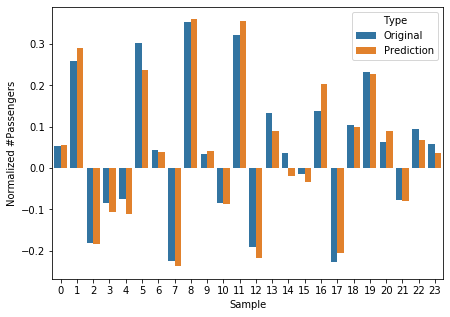

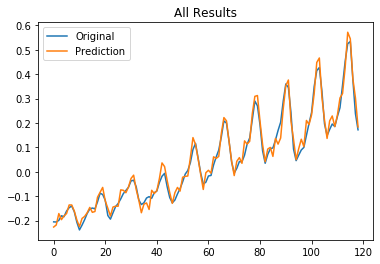

In [6]:
machine = Machine()
machine.run(epochs=4000)

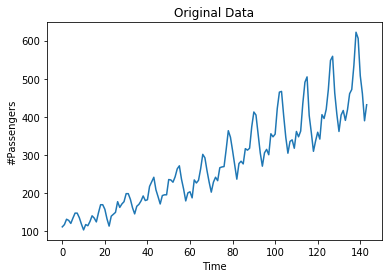

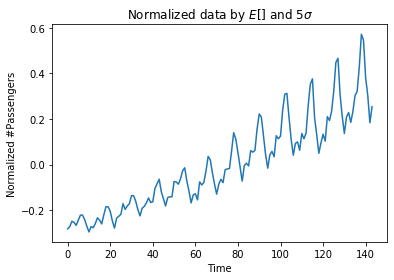

(119, 24, 1) (119,)
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 24, 1)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


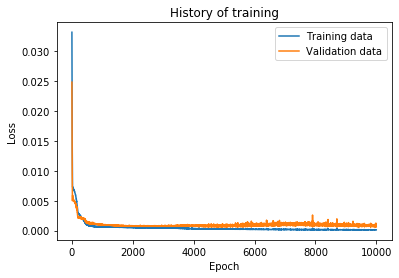

24/24 [==============================] - 0s 166us/step
Loss: 0.0006484625046141446


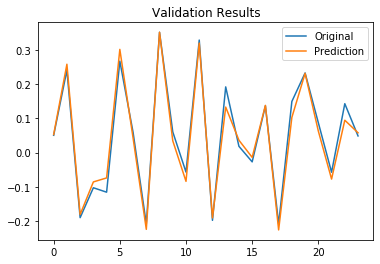

24/24 [==============================] - 0s 157us/step
Loss: 0.0006484625046141446
(24,) (24,)


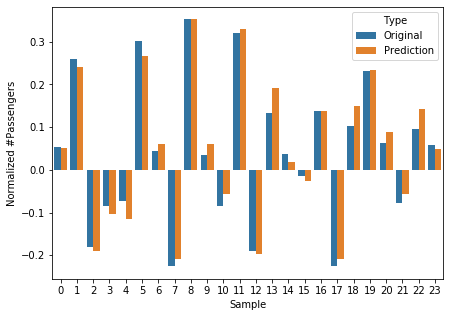

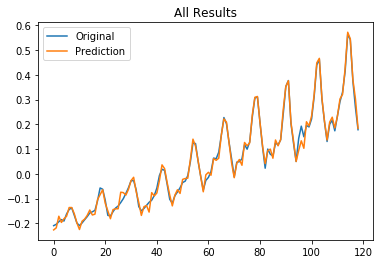

In [7]:
machine = Machine()
machine.run(epochs=10000)

In [8]:
dataset = pd.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)


In [9]:
dataset

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390
